# Python intensive, part 5

In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns

## Review of Part 4

Welcome to Part 5 of our Python Intensive. In the previous session, we learned about data structures in python, in particular the list, the dictionary, and pandas dataframes. 

Today we will continue learning about how to use dataframes to transform your data. We will also briefly learn about how to plot your dataframe using the library seaborn. 

## `pandas` continued

Now that we've learned how to inspect the data, let's learn how to work with the data! 

As a refresher, in the Palmer penguins dataset, each row represents an individual penguin, and each column represents a different measurement or characteristic of the penguin, such as its body mass or island of origin. The data are organized in this way so that variables (things we may want to compare against each other) are the columns while observations (the individual penguins) are the rows. This is a common way to organize data in data science and is called **tidy data**.


In [2]:
penguins = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-07-28/penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Here is an example of a transformation that we will be able to do with `pandas` that would be difficult to do manually. We can summarize the data by calculating the average body mass (in kg) of each penguin species, broken up by sex. Using a few lines of code we can go from our raw data to a table that looks like this:


| species   | sex    | body_mass_kg |
| --------- | ------ | -------------|
| Adelie    | female | 3.368836 |
| Adelie    | male   | 4.043493 |
| Chinstrap | female | 3.527206 |
| Chinstrap | male   | 3.938971 |
| Gentoo    | female | 4.679741 |
| Gentoo    | male   | 5.484836 |


Now, let's get started learning how this is done! 

In the subsequent sections, we will sometimes not be saving the results of our transformations to a new variable, but rather just displaying the results below the code block. This is because we are usually just demonstrating the transformation, and not actually using the results in further analysis. In practice, you would usually save the results and then use them in another transformation. But we wanted to keep the namespace clean and code blocks short. 

## Modifying a dataframe
Now that we have our external data read into a DataFrame, we can begin to work our magic. If you have ever worked with `tidyverse` in the R language some of this might look familiar to you, as `pandas` serves a similar role and can do many of the same functions. Let's look at several useful common examples.

### Filtering
When we discussed indexing, we looked at how we can select specific rows and columns in a dataframe, but often we will want to select rows based on a certain condition, e.g. in the dataframe that we just imported, only take the rows where the 'body_mass_g' column has a value greater than a given number. We can do this easily by specifying which column to filter on and a boolean statement, like so:

In [ ]:
print(penguins[penguins['flipper_length_mm'] == 181.0])

#Saving as new data frame (optional):
penguins_filtered = penguins[penguins['body_mass_g'] > 3300]

penguins_filtered.head()

Filtering does not alter the original data. You can assign the result of the filtering to a new variable, and then you will keep the original and have a filtered version. Under the hood, the way filtering works is the inner statement `penguins['body_mass_g'] > 3300` creates a boolean mask that is the same length as the number of rows in the dataframe, where each element is `True` if the condition is met and `False` otherwise.

In [ ]:
penguins['body_mass_g'] > 3300

Then, we use that boolean mask to select only the rows where the condition is `True`. 

In [ ]:
penguins[penguins['body_mass_g'] > 3300]

We can get more advanced with our filtering logic by adding multiple conditions and the following logical operators:

- `&`: "and"
- `|`: "or"
- `~`: "not"

**Note that these are different logical operators than we have previously learned in base python!**

If using multiple conditions, be sure to enclose each of them in parentheses!

In [ ]:
penguins[(penguins['body_mass_g'] > 3300) & (penguins['bill_length_mm'] > 38)]

`pandas` also has a helper method called `.isin()` that is similar to the `in` operator in base python. It allows you to filter a dataframe based on whether a column value is in a list of values.

In [3]:
penguins[penguins['species'].isin(['Adelie', 'Gentoo'])]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009
273,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,male,2009
274,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,female,2009


While you can use `.isin()` to filter numerical values, it is not recommended for checking a large range of values. This is because you will only be checking against a finite list of numbers rather than all the numbers between two values. If you do want to check a range of numbers, there's also the `.between()` method, which makes stringing together numerical comparisons nicer to read.

In [ ]:
# This is okay because we know years are only whole numbers, but still not very clear
# range generates numbers from left to right in whole number steps, exclusive of the right number
penguins[penguins["year"].isin(range(2007, 2009))]

# This is not okay because there are floating point numbers in bill_depth_mm
# range(10,15) only generates the list of numbers [10, 11, 12, 13, 14]
penguins[penguins["bill_depth_mm"].isin(range(10,15))]

# Instead, try .between(), which makes the code clearer to read
# The inclusive parameter can be one of ['neither', 'left', 'right', 'both']
penguins[penguins["bill_depth_mm"].between(10,15, inclusive='both')]

# Or use boolean operators
penguins[(penguins["bill_depth_mm"] >= 10) & (penguins["bill_depth_mm"] <= 15)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
152,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,female,2007
154,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,female,2007
156,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,male,2007
157,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,female,2007
158,Gentoo,Biscoe,45.4,14.6,211.0,4800.0,female,2007
...,...,...,...,...,...,...,...,...
260,Gentoo,Biscoe,43.3,14.0,208.0,4575.0,female,2009
266,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,female,2009
270,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,female,2009
272,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,female,2009


>**Exercise**: filter the dataframe to only keep the birds observed in the `year` 2007 and with a `bill_length_mm` greater than 38mm

In [ ]:
# Your code here

In [ ]:
#@title Solution {display-mode: "form"}

penguins[(penguins["year"] == 2007) & (penguins["bill_length_mm"] > 38)]

>**Exercise**: filter the dataframe to keep only male birds found on the islands of "Torgersen" or "Dream"

In [ ]:
# Your code here

In [ ]:
#@title Solution {display-mode: "form"}
penguins[(penguins["sex"] == "male") & (penguins["island"].isin(["Dream", "Torgersen"]))]

We can also filter based on strings, not just numbers! For this, you will want to use a string matching function from python, such as `.str.contains()` (which also a partial match), `.str.startswith()` (checks to see if a value starts with a given string), or others. In the below example, the code looks for the string 'Adel' (case-insensitive, as we specify `case=False`) and only takes rows that contain the string somewhere in the `species` column.

In [ ]:
penguins[penguins['species'].str.contains('Adel', case=False)]

#### Missing data in DataFrames

Missing numerical data in a DataFrame is typically represented by `NaN` (Not a Number). Pandas handles missing data in some specific ways, which we will discuss in this section.

Missing numbers are propagated through the DataFrame when doing arithmetic operations. In the example below, when we try to sum the two columns together element-wise, any row where one of the columns has a missing value will result in the sum being `NaN`.

!!! **Note** 
    You may also see `NA` (Not Available) used interchangeably with `NaN` in some contexts, but they generally refer to the same concept of missing data. Under the hood, `NA` is a `pandas` library specific missing data format. It behaves slightly differently and is meant to be a general purpose missing value marker. For more information, you can refer to the [pandas documentation on working with missing data](https://pandas.pydata.org/docs/user_guide/missing_data.html) and the nullable [boolean](https://pandas.pydata.org/docs/user_guide/boolean.html) and [integer](https://pandas.pydata.org/docs/user_guide/integer_na.html) data types. 

In [20]:
ser1 = pd.Series([np.nan, np.nan, 2, 3])
ser2 = pd.Series([1, 2, np.nan, 4])
ser1 + ser2

0    NaN
1    NaN
2    NaN
3    7.0
dtype: float64

When using descriptive statistics and computational methods like `.sum()`, `.mean()`, pandas will ignore missing values and excludes them from the calculation. 

In [21]:
print(ser1.sum())

print(ser1.mean())

5.0
2.5


This behavior can be changed by using the `skipna` argument, which is `True` by default. If you set `skipna=False`, pandas will treat missing values as `NaN` and will not ignore them, resulting in the whole operation returning `NaN`. If the data do not contain any missing values, the result would be processed normally. 

In [22]:
print(ser1.mean(skipna=False))

nan


To deal with missing values, you may want to use the `.fillna()` method to fill in missing values with a specific value or computed value. This fillna has the parameter "method" which can be forward fill (method='ffill') or backward fill (method='bfill'). 

From the docs: ffill: propagate last valid observation forward to next valid. bfill: use next valid observation to fill gap.

Be aware that if you substitute your NaN values with a number (e.g. 0), then pandas will treat those numbers as part of the calculation, which may not be what you want.

In [ ]:
print("Mean with NaNs filled with 0: ", ser1.fillna(0).mean())
print("Original ser1 mean:", ser1.mean())


One very useful function to know is how to get rid of rows with missing data in them, as including them can often cause errors in downstream analysis or skew your results. There is a convenient function built in to `pandas` that does this called `.dropna()`. By default, it will drop any row that has a missing value in any column. This may not always be what you want. You can specify which columns to look at using the `subset` argument. 

In [ ]:
penguins_nona = penguins.dropna()

penguins_nona.info()

In [ ]:
penguins_nona_bill_len = penguins.dropna(subset=["bill_length_mm"])

penguins_nona_bill_len.info()

Alternatively, you may want to fill in missing values with a specific value. You can do this using the `.fillna()` method.

**Exercise**: Use `.fillna()` to replace all the missing values in the `sex` column with the string "unknown". Save the result as a new dataframe called `penguins_fillna`. *Hint: you can use the `copy()` method to create a copy of the original dataframe, so that you don't modify it directly.*

In [ ]:
# Your code here

In [ ]:
#@title Solution {display-mode: "form"}
penguins_fillna = penguins.copy()
penguins_fillna['sex'] = penguins['sex'].fillna("unknown")

### Calculating new columns

Let's say we will want to create a new column in our dataframe by applying some function to existing columns. For instance, in the dataframe of penguins data that we have been using, we want a column that normalizes `body_mass_g` column by performing a z-transform. A z-transform is the value minus the mean of the column divided by the standard deviation of the column. 

First, we put the name of the new column, `body_mass_z` in square brackets after our `penguin` DataFrame variable. Then we pull out the `body_mass_g` column and perform the calculation, using helper methods like `.mean()` and `.std()`, on the right side of the assignment operator. This syntax is similar to creating a new key in a dictionary.

In [ ]:
# Z-transform the body mass column

penguins["body_mass_z"] = (penguins["body_mass_g"] - penguins["body_mass_g"].mean()) / penguins["body_mass_g"].std()

penguins.head(10)

>**Exercise:** We can use multiple columns in the calculation of the new column. Create a column that contains the volume of the penguin's beak by assuming it is a cylinder, with `bill_length_mm` as the height and `bill_depth_mm` as the diameter. 
>
> **Hint:** The volume of a cylinder is given by the formula $V = \pi r^2 h$, where $r$ is the radius (half the diameter) and $h$ is the height. You can use `np.pi` to get the value of $\pi$ in Python.

![](https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png)

In [ ]:
# Your code here

In [ ]:
#@title Solution {display-mode: "form"}

penguins["bill_volume"] = (penguins["bill_depth_mm"]/2)**2 * np.pi * penguins["bill_length_mm"]

penguins.head()

### Summarizing your data

Another common task in data analysis is to calculate summary statistics of your data. Pandas as a number of helper methods like `.mean()`, `.median()`, `.count()`, `unique()`, etc. that can be used to describe your data. Pandas DataFrames has a handy `.describe()` method that will give you a summary of the data in each column. By default, it will calculate the count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum of each numerical column. However, if you give it the `include='all'` or `include='object'` argument, it will also include the count, unique, top, and freq (of top) of each categorical column.

In [ ]:
penguins.describe()

In [ ]:
penguins.describe(include='all')

In [ ]:
penguins.describe(include='object')

### Grouping and transforming your data

What if we want to use one of the categorical variables in our data as a factor level to calculate our summaries? For example, we may want to separately get the mean flipper length of each `species` of penguin. In order to do this, we need to do the following things:

1. Split our data into different **groups** (e.g. based the values in the `species` column)
2. Apply some function (**aggregation** or **transformation**) to each group in our data (e.g. calculates the mean) 
3. Combine each group back together into an output object

We input the column we want to group by into the `.groupby()` method. This creates a **grouped dataframe** object that acts like the regular dataframe, but is split into groups based on the column we specified.

In [ ]:
penguin_groups = penguins.groupby('species')
print(penguin_groups)


We can see that on its own this is not especially useful, as grouping the DataFrame does not produce a new DataFrame (just this weird output message telling us that this is a `DataFrameGroupBy` object). In order to output a DataFrame, we need to pass the grouped DataFrame to some function that aggregates or transforms the data in each group.

We group our data, select the column we want to aggregate (in this case, `flipper_length_mm`) and apply the `.mean()` function to it:

In [ ]:
#Note the square brackets around the column name
penguins.groupby('species')['flipper_length_mm'].mean()

When we apply the `.mean()` method to the grouped dataframe, it returns a `Series` object with the mean flipper length of each species. The exact details of whether pandas returns a `groupby` object as a Series or a DataFrame gets a little technical; for our purposes, just know that you can make sure the returned object is converted to a DataFrame (which is usually most convenient) by using the `.reset_index` function:

In [ ]:
penguins.groupby('species')['flipper_length_mm'].mean().reset_index()

We can group by multiple columns by passing a *list of column names* to the `.groupby()` method (and using `reset_index()` as before to have it output as a DataFrame): 

In [ ]:
penguins.groupby(['species', 'sex'])['flipper_length_mm'].mean().reset_index()

So far we have just been applying the `.mean` function to our groups, but we can use other functions as well! One very useful function to know when grouping is `.size()`, which will return the number of rows in each group.

In [ ]:
penguins.groupby(['species', 'sex']).size()

>**Exercise:** Use grouping to answer the following question about the penguins dataset: Which island has the most Adelie penguins?
>
> **Hint:** Think about which order you should group by for the most readable output

In [ ]:
# Your code here

In [ ]:
#@title Solution {display-mode: "form"}

penguins.groupby(['species', 'island']).size()

> Now try your previous code with the order of the columns to group by switched. What changes?

In [ ]:
penguins.groupby(['island', 'species']).size()

This shows us that grouping occurs **hierarchically**, meaning pandas groups data in the order that you specify in! In our case the result is the same (i.e. the counts are equal no matter which column you group on first), but one way is more readily readable for our question than the other. 


There are niche situations where it might matter, e.g. your aggregation function depends on the order of values (e.g. if you are sorting your grouped data), or you are doing some non-commutative operation, but generally speaking the results will be the same. 

> Exercise: now that we have an understanding of pandas, let's go back to our initial example! Calculating the average body mass (in **kg**) of each penguin species, by sex. We are aiming to reproduce the table below:
>
> Make sure you end up with a DataFrame and not a Series. 


| species   | sex    | body_mass_kg |
| --------- | ------ | ------------ |
| Adelie    | female | 3.368836 |
| Adelie    | male   | 4.043493 |
| Chinstrap | female | 3.527206 |
| Chinstrap | male   | 3.938971 |
| Gentoo    | female | 4.679741 |
| Gentoo    | male   | 5.484836 |



In [ ]:
# Your code here

# get body mass in kg

# get mean body mass by species and sex

In [ ]:
#@title Solution {display-mode: "form"}

# get body mass in kg
penguins["body_mass_kg"] = penguins["body_mass_g"] / 1000

# get mean body mass by species and sex
penguins.groupby(['species', 'sex'])["body_mass_kg"].mean().reset_index()

> **Exercise**: using the `.max()` function, find the weight of the largest bird on each island.

In [ ]:
# Your code here

In [ ]:
#@title Solution {display-mode: "form"}

penguins.groupby('island')['body_mass_g'].max()

To perform more complex operations on your grouped data, you can use the `.transform()` method. Transform applies a function to your data, so what you pass to it is actually a function, which can be a built-in function or one you define yourself. For example, we can use it to calculate the z-statistic of body mass by first definint the z-statistic function, and then passing it to the `.transform()` method:

In [ ]:
def z_stat(x):
    return (x - x.mean()) / x.std()

penguins['body_mass_z_by_sex'] = penguins.groupby('sex')['body_mass_g'].transform(z_stat)

In the next two code blocks we visually illustrate the difference between body_mass_z, calculated with the whole table, and body_mass_z_by_sex, grouped by sex. We will be using the `.plot()` method that is built into pandas to make quick plots. This plotting function is built on top of `matplotlib` and you can read more about it in the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). However, we will not go into detail about how to use it here, as we will be using the `seaborn` library for plotting in the next section.


In [ ]:

penguins.groupby(['sex'])["body_mass_z"].plot(kind="density", legend="true")

In [ ]:
penguins.groupby(['sex'])["body_mass_z_by_sex"].plot(kind="density", legend='true')

**Exercise**: You may have noticed the bimodal distribution of the z-statistic of the plots above. Perhaps species differences in body mass are being reflected in this? Repeat the previous transformation, but this time group by both `sex` and `species`. Create a new column called `body_mass_z_by_sex_species` that contains the z-transformed body mass within each sex and species group. Then plot the distribution of the z-statistic grouped by both `sex` and `species`.

In [ ]:
# Your code here

In [ ]:
#@title Solution {display-mode: "form"}

penguins_test = penguins.copy()
penguins_test["bm_z_sex_species"] = (
    penguins_test.groupby(["sex", "species"])["body_mass_g"]
    .transform(z_stat)
)
penguins_test.groupby(["sex", "species"])["bm_z_sex_species"].plot(kind="density", legend = "true")

## Seaborn
### Plotting with Seaborn
In addition to knowing how to import and manipulate data, we often want to also *visualize* our data. There are many tools available that are specialized in plotting data, such a R and ggplot, Excel, etc., but often it can be helpful to do some quick visualization in python as part of a pipeline. The "classic" way to do this is using the `matplotlib` library, but for this workshop we are instead going to use `seaborn`, which is based on `matplotlib` but has (in our opinion) better syntax (being somewhat reminiscent of `ggplot`, a commonly-used R library), and is specially designed to integrate with `pandas`. 

 Plotting can get quite complicated, so we are going to stick to some more "cookie-cutter" implementation that is geared more towards exploratory analysis, rather than making publication-quality figures.

Just as before, it can be helpful to think about what your end goal looks like. Let's say I want to end up with a scatterplot that shows bird bill length relative to body weight, with the *color* of each point corresponding to bird species, and the *shape* of the point corresponding to bird sex. With that goal in mind, let's look at syntax.

### Defining the Data
We are going to continue using our penguins data set. `seaborn` has numerous functions for drawing different plots, summarized in the figure below. There are three different broad "families" of `seaborn` plots, which are shown in the figure below:


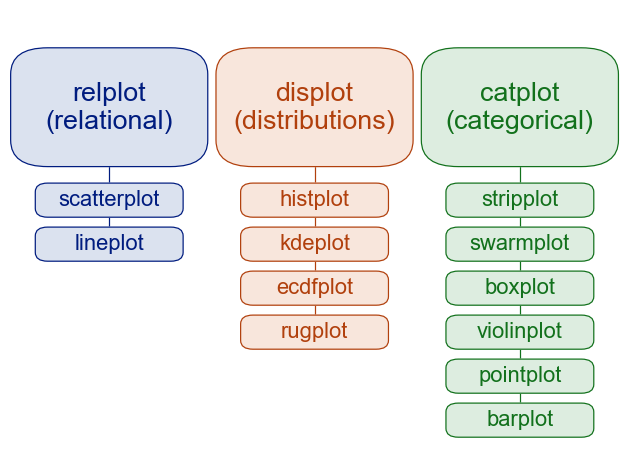

- `relplot` plots show relationships between variables
- `displot` show distibutions
- `catplot` plot categorical data 

Each plot function within a family usually has similar syntax, as they represent data in similar ways. To create a plot, we call one of these functions and specify our (`pandas`) dataframe and which columns to encode in which axis. For example, if we wanted a histogram:

In [ ]:
# get a fresh copy of our penguins dataset
penguins = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-07-28/penguins.csv')
penguins.head()

In [ ]:
sns.histplot(data=penguins, x="flipper_length_mm")

We can see that for this type of plot, we only need to encode a single column (for the x-axis), but other types of plots might require additional axes. For example, a boxplot needs both an x and y axis defined:

In [ ]:
sns.boxplot(data=penguins,x="species",y="bill_length_mm")

Documentation for each plot type is on `seaborn`'s website, and it lists all required and optional arguments for each plot function: [seaborn](https://seaborn.pydata.org/index.html)

### Changing plot aesthetics
We can do much more useful things than just setting the x and y axis, however! We will frequently want to group our data, e.g. by species, by sex, etc., and change the plot aesthtics to reflect these groups. To do this, we add an additional argument that specifies which column in our data frame that we want to group on. For example, to color the bars on our histogram based on species, we would use the `hue` argument: 

In [ ]:
sns.histplot(data=penguins, x="flipper_length_mm",hue="species")

We can see we have changed the colors of the bars, but as they are overlapping it is difficult to read. If we dig into the documentation of the `histplot` function, we can find that there is also the `multiple` argument, which changes how overlapping bars behave...let's make them stack instead of overlap:

In [ ]:
sns.histplot(data=penguins, x="flipper_length_mm",hue="species",multiple="stack")

>**Exercise**: check the documentation page for the `scatterplot` function, and see if you can figure out how to make a scatter plot that shows bird bill length relative to body weight, with the *color* of each point corresponding to bird species, and the *shape* of the point corresponding to bird sex.

In [ ]:
# Your code here

In [ ]:
#@title Solution {display-mode: "form"}

sns.scatterplot(data=penguins, x='bill_length_mm', y='body_mass_g', hue='species', style='sex')

### PCA plot example

In the next exercise, we will walk you through plotting a principal component analysis (PCA) of the penguins dataset. PCA is a type of multivariate data visualization that helps to identify patterns in high-dimensional data, such as when multiple variables are contributing to some categorical outcome. In this case, we can use PCA to look at how the measurements of our penguins relate to the species. We will use the numerical features of the penguins dataset to perform the PCA and then visualize the results. The steps to perform the PCA are:

0. Load a fresh copy of the penguins dataset
1. Remove the rows with missing values in the numerical columns
2. Standardize the numerical features (mean = 0, standard deviation = 1)
3. Perform PCA on the standardized data (using `sklearn`)
4. Save the PCA results to a new DataFrame
5. Visualize the PCA results using `seaborn`

>**Exercise**: Remove the rows of the penguins dataset with missing values in the numerical columns, save it to a new dataframe called `penguins_clean`. 

In [24]:
penguins = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-07-28/penguins.csv')

# Your code here

In [25]:
#@title Solution {display-mode: "form"}

penguins = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-07-28/penguins.csv')
num_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
penguins_clean = penguins.dropna(subset=num_columns)
penguins_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               342 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 24.0+ KB


>**Exercise**: Standardize the numerical features using the formula `(x - mean) / std`, and save the result to a new dataframe called `penguins_standardized`.

In [ ]:
# Your code here

In [26]:
#@title Solution {display-mode: "form"}

def scaling(x):
    return (x - x.mean()) / x.std()

penguins_standardized = penguins_clean.copy()

penguins_standardized[num_columns] = penguins_standardized[num_columns].transform(scaling)

penguins_standardized

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,-0.883205,0.784300,-1.416272,-0.563317,male,2007
1,Adelie,Torgersen,-0.809939,0.126003,-1.060696,-0.500969,female,2007
2,Adelie,Torgersen,-0.663408,0.429833,-0.420660,-1.186793,female,2007
4,Adelie,Torgersen,-1.322799,1.088129,-0.562890,-0.937403,female,2007
5,Adelie,Torgersen,-0.846572,1.746426,-0.776236,-0.688012,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,2.175637,1.341320,0.432721,-0.251578,male,2009
340,Chinstrap,Dream,-0.077282,0.480471,0.077145,-0.999750,female,2009
341,Chinstrap,Dream,1.040019,0.531109,-0.562890,-0.532143,male,2009
342,Chinstrap,Dream,1.259816,0.936215,0.646066,-0.126883,male,2009


Perform a PCA on the standardized data and save the results to a new DataFrame called `penguins_pca`. We will provide the code for this below:

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pcs = pca.fit_transform(penguins_standardized[num_columns])
loadings = pca.components_.T
penguins_pca = pd.DataFrame(data = pcs, columns = ["PC1", "PC2", "PC3", "PC4"])
penguins_pca

,PC1,PC2,PC3,PC4
0,-1.840748,0.047632,-0.232454,-0.523136
1,-1.304850,-0.427722,-0.029519,-0.401838
2,-1.367178,-0.154250,0.198382,0.527234
3,-1.876078,-0.002045,-0.617691,0.477678
4,-1.908951,0.827996,-0.685580,0.207124
...,...,...,...,...
337,0.564782,2.348747,0.890184,0.393769
338,-0.731309,0.252998,0.327712,0.732163
339,-0.355185,0.998447,0.895969,-0.194741
340,0.501299,1.489800,0.345720,0.553902


**Exercise**: Plot the PCA as a scatterplot (PC1 on the x axis and PC2 on the y axis), colored by the species variable. You will need to add the `species` column from the `penguins` DataFrame to the PCA DataFrame before plotting. As a bonus, also make another plot with PC2 on the x axis and PC3 on the y axis.

In [ ]:
# Your code here

<Axes: xlabel='PC1', ylabel='PC2'>

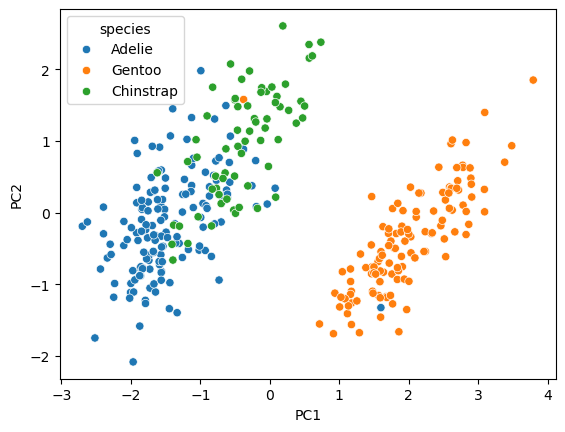

In [33]:
#@title Solution {display-mode: "form"}

penguins_pca['species'] = penguins_standardized['species']

sns.scatterplot(penguins_pca, x = "PC1", y = "PC2", hue = "species")

<Axes: xlabel='PC2', ylabel='PC3'>

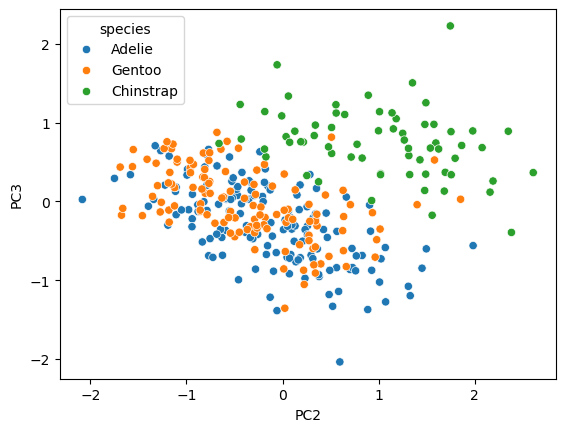

In [34]:
#@title Solution {display-mode: "form"}

sns.scatterplot(penguins_pca, x = "PC2", y = "PC3", hue = "species")

### Limitations of Seaborn

While seaborn is a great first step to learning how to plot flat dataframes at a high-level it is limited in its ability to add annotations and layers to plots. For example, a common feature of PCA plots is to include arrows that indicate the loadings of the original features on the principal components. These arrows visualize which numerical variables are contributing the most to each principal component. To create more advanced visualizations with such annotations, you will have to integrate seaborn with its underlying matplotlib functionality. Below is an example code for also plotting the loadings on a PCA, using seaborn and matplotlib. 

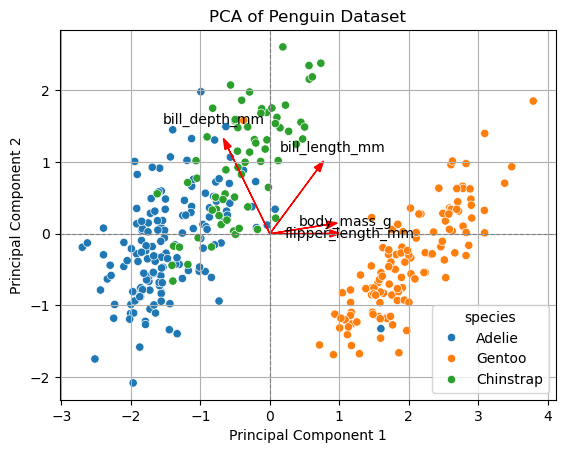

In [ ]:
#@title Example matplotlib {display-mode: "form"}

import matplotlib.pyplot as plt

plt.figure()
sns.scatterplot(data=penguins_pca, x="PC1", y="PC2", hue="species")
loadings = pca.components_.T
loading_pc1_pc2 = pd.DataFrame(loadings[:, :2], index=num_columns, columns=['PC1', 'PC2'])

for feature, (x, y) in loading_pc1_pc2.iterrows():
    plt.arrow(0, 0, x*1.5, y*1.5, color='red', head_width=0.1)
    plt.text(x*2, y*2, feature, color='black', ha='center', va='center')

plt.title('PCA of Penguin Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.axhline(0, color='grey', lw=0.8, ls='--')
plt.axvline(0, color='grey', lw=0.8, ls='--')

If you plan to use python for your plotting needs, we recommend learning matplotlib. Seaborn is suitable for quick exploratory data analysis and visualization of simple relationships, but for more complex visualizations, matplotlib is necessary.

## Working with real life data: Data cleaning



While the penguins dataset has some missing values, it is still organized in a way that is easy for the computer to understand. However, in real life, data can be messy and needs to be pre-processed before it can be used for analysis. This process is called **data cleaning**. We will now download the **raw** version of the penguins dataset and learn some functions that will help take it from the raw version to the clean version we have been using so far.

In [ ]:
penguins_raw = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-07-28/penguins_raw.csv")

In [ ]:
penguins_raw

The first thing we might want to do is to clean up the column names, as they may contain spaces or special characters that could mess up future code. Here are some things we want to do:

- Replace spaces with underscores
- Convert all characters to lowercase
- Remove special characters (e.g. punctuation)

We can do this in a step-wise manner, or we could create a function that does all of this at once. For now, let's just do it step by step:

In [ ]:
penguins_raw.columns = (penguins_raw.columns
                        .str.replace(" ", "_")
                        .str.lower()
                        .str.replace(r"[^\w]", "", regex=True)
)
penguins_raw

| Command                      | Explanation |
| ---------------------------- | ----------- |
| `penguins_raw.columns`       | This accesses the column names of the dataframe `penguins_raw`. |
| `.str.replace(" ", "_")`     | This replaces spaces in the column names with underscores. |
| `.str.lower()`               | This converts all characters in the column names to lowercase. |
| `.str.replace(r"[^\w]", "")` | This removes all special characters from the column names using a **regular expression** |

Regular expression breakdown:

| Character | Meaning |
| --------- | ------- |
| `r`       | This makes the following string raw, meaning `\` characters are treated literally. (Commonly in CS, `\` is an escape character, but in regex it is used to denote special characters.) |
| `[...]`   | This is what the pattern is trying to match. |
| `^`       | This is the negation symbol, meaning "not", so it will match anything that is not the expression that follows. |
| `\w`      | This is a special operator that matches "word characters", so letters, numbers and underscores. |

Note that modifying the column names did modify the original dataframe so we didn't need to create a new one. 

>**Exercise**: If you find yourself frequently cleaning up column names, you might want to create a function that does this for you so you don't have to repeat the same code each time. Create a function called `clean_column_names` that takes a DataFrame as input and returns a new DataFrame with cleaned column names.

In [ ]:
# Your code here

In [ ]:
#@title Solution {display-mode: "form"}

def clean_column_names(df):
    df.columns = (df.columns
                  .str.replace(" ", "_")
                  .str.lower()
                  .str.replace(r"[^\w]", "", regex = True))
    return df

There are a few more things that need to be done with this data:

1. Rename `culmen_length_mm` and `culmen_depth_mm` to `bill_length_mm` and `bill_depth_mm`, respectively.
2. Make the `sex` column into lowercase. 
3. Create a new column called `year` that is just the year from the `date_egg` column. And store it as an integer.
4. Have the `species` column to only include the first word (i.e. just the common name)
5. Select only the columns that we want to keep in the final dataframe: `species`, `sex`, `year`, `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`.

>**Exercise**: Work with a partner to complete the above tasks. You can divvy up the tasks and then combine your results at the end. You will make use of the  `.rename()`, `.astype()`, and `.str.split()` methods. It would be useful to look at the documentation for these methods to see how they work.

In [ ]:
# Your code here

In [ ]:
penguins.info()

In [ ]:
#@title Solution {display-mode: "form"}

penguins_clean = penguins_raw.copy()

# 1. rename the bill depth/width columns
penguins_clean.rename(columns = {"culmen_length_mm": "bill_length_mm", 
                                 "culmen_depth_mm": "bill_depth_mm"}, inplace=True)

# 2. Make the sex column lowercase
penguins_clean["sex"] = penguins_clean["sex"].str.lower()

# 3. create the year column from date_egg
penguins_clean["year"] = penguins_clean["date_egg"].str.split("-", expand=True)[0].astype("int64")

# 4. Have the `species` column to only include the first word (i.e. just the common name)
penguins_clean["species"] = penguins_clean["species"].str.split(" ", expand=True)[0]

# 5. Select only the columns that we want to keep in the final dataframe: `species`, `sex`, `year`, `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`.
penguins_clean = penguins_clean[["species","island", "sex", "year", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]

print(penguins_clean.info())
penguins_clean
